# Sobel Filter


In [3]:
import tensorflow as tf
import numpy as np
import seaborn as sns
import cv2
import matplotlib.pyplot as plt

## Loading image in grayscale

(480, 640)

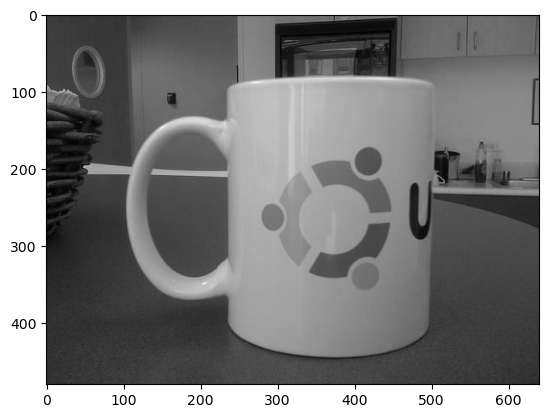

In [4]:
#image_bytes = tf.io.read_file("mug.jpg")
#mugGray = tf.image.decode_image(image_bytes,channels=1)
mugGray = cv2.imread('mug.jpg', cv2.IMREAD_GRAYSCALE)
plt.imshow(mugGray, cmap='gray')
testImageHeight  = mugGray.shape[0]
testImageWidth = mugGray.shape[1]
imageNChannels = 1
mugGray.shape

## Make horizontal and vertical sobel filters

In [5]:
# Sobel operator for horizontal edge detection
Kx = np.array([[-1, 0, 1],
               [-2, 0, 2],
               [-1, 0, 1]])
# Sobel operator for vertical edge detection
Ky = Kx.T

<Axes: >

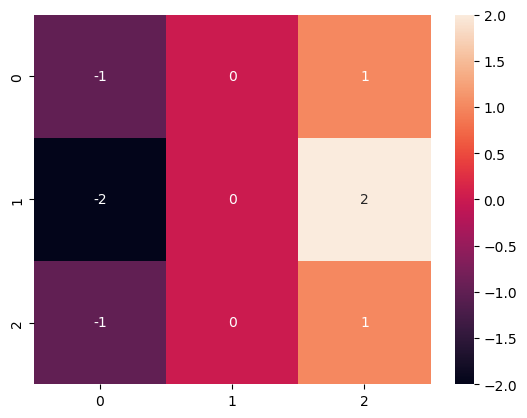

In [6]:
sns.heatmap(Kx,annot=True)


<Axes: >

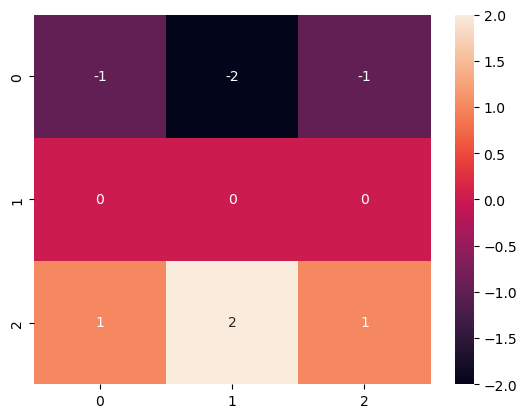

In [7]:
sns.heatmap(Ky,annot=True)

## Apply Filters (no padding)

In [8]:
# Without using padding, the output array is 2 pixels shorter on each dimension
# output size calculated using the formula [(W−K+2P)/S]+1  
convolvedShape = (testImageHeight - 2, testImageWidth - 2)
mugEdgesx = np.zeros(convolvedShape) # Horizontal
mugEdgesy = np.zeros(convolvedShape) # Vertical
mugEdges  = np.zeros(convolvedShape) # Combined

In [9]:
for i in range(1, testImageHeight-1):
    for j in range(1, testImageWidth-1):
        window = mugGray[i-1:i+2, j-1:j+2]
        a = mugEdgesx[i-1, j-1] = np.maximum(np.sum(np.multiply(window, Kx)), 0)
        b = mugEdgesy[i-1, j-1] = np.maximum(np.sum(np.multiply(window, Ky)), 0)
        mugEdges[i-1, j-1]      = np.sqrt(a**2 + b**2)

## Visualize Results

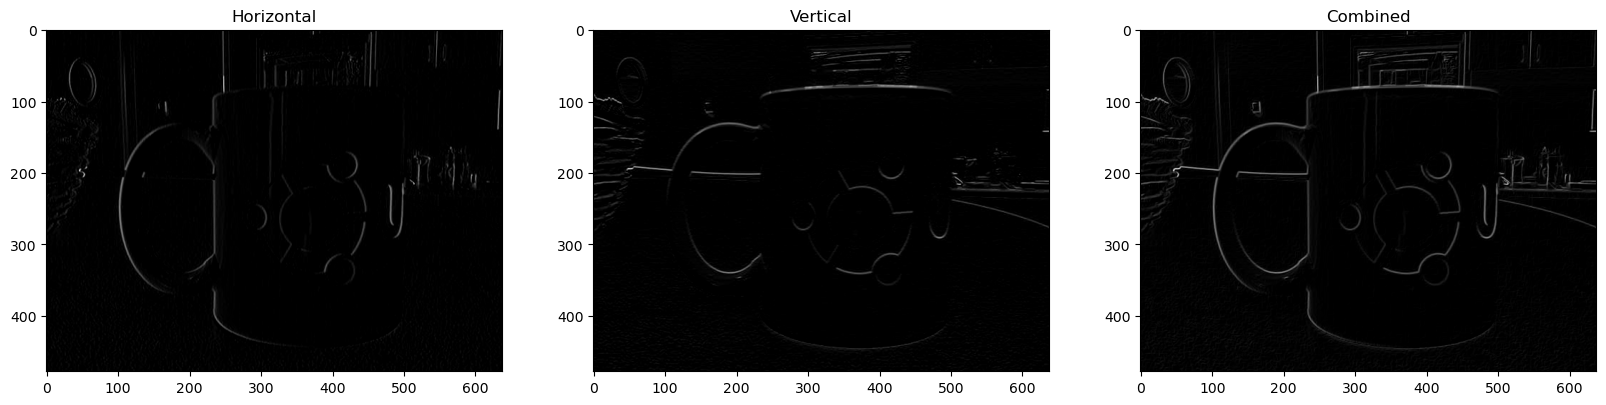

In [10]:
plt.figure(figsize=(20,7))
plt.subplot(1, 3, 1)
plt.imshow(mugEdgesx, cmap='gray');
plt.title('Horizontal')
plt.subplot(1, 3, 2)
plt.imshow(mugEdgesy, cmap='gray');
plt.title('Vertical')
plt.subplot(1, 3, 3)
plt.imshow(mugEdges, cmap='gray');
plt.title('Combined');